#**Loading and Preprocessing Data**

In [44]:
import pandas as pd
import altair as alt
import plotly.graph_objects as go
pd.set_option('Display.max_rows', None)

woody_breaking_stats = 'https://drive.usercontent.google.com/download?id=1VV_OmRfxTJ0WWtLd8mMT93kind-91A0y&export=download&authuser=0&confirm=t&uuid=28ea378c-9a3d-4407-ae7b-9dc5f8535083&at=APZUnTUCOhcajX9gfndCLFxlmbXH:1715189853628'
woody_colored_stats = 'https://drive.usercontent.google.com/download?id=1fKNFZmWwecC1tZokVOEfp16svKg0YHi8&export=download&authuser=0&confirm=t&uuid=ee245844-cbd6-4735-9a3b-8cc8c9f528b3&at=APZUnTWHBnbcwWyzXNDkSNevT-E4:1715189854283'
redmaple_colored_stats = 'https://drive.usercontent.google.com/download?id=1J2CSdyS28BdefqCtWQg--sxQAvMtuJoB&export=download&authuser=0&confirm=t&uuid=89bd8b7c-04a1-4e15-ade9-15b8b5be75dc&at=APZUnTVv40oYdWQKaj6d9GjrXGqj:1715189852194'
redmaple_breaking_stats = 'https://drive.usercontent.google.com/download?id=11RwxOYck8U52NZFsQ1wNQ1LmD44sMhU3&export=download&authuser=0&confirm=t&uuid=0cab6140-921e-4852-807d-bb5395eedf44&at=APZUnTX1sO7YILeQhdrMqZtJAs8z:1715189851339'
herb_mohonk_stats = 'https://drive.usercontent.google.com/download?id=1-0e3Tb113UlFaKCeFTIslJtUNukEnsyp&export=download&authuser=0&confirm=t&uuid=87e2b2b0-0e85-4908-ba87-e1a497146ff5&at=APZUnTWQ3-zscU7u01lZmoRRCqrR:1715189850138'
herb_fls_stats = 'https://drive.usercontent.google.com/download?id=18hYy98jXAdDRL_KyZ4GwS2jy33FN_-nF&export=download&authuser=0&confirm=t&uuid=92c34221-2278-4baf-8377-6c4f4abd1e99&at=APZUnTWlmy1_iRrX4W5Zuj5EZByH:1715189849269'

df1 = pd.read_csv(woody_breaking_stats)
df2 = pd.read_csv(woody_colored_stats)
df3 = pd.read_csv(redmaple_colored_stats)
df4 = pd.read_csv(redmaple_breaking_stats)
df5 = pd.read_csv(herb_mohonk_stats)
df6 = pd.read_csv(herb_fls_stats)

df_all = pd.concat([df1, df2, df3, df4, df5, df6])
print(df_all.shape)


(1577, 9)


In [3]:
df_all['grouping'] = df_all['grouping'].str.replace("['()]",'',regex=True)

In [4]:
df_all['State'] = df_all['grouping'].str.split(',').str[-1].str.strip()
df_all['site'] = df_all['grouping'].str.split(',').str[-2].str.strip()

In [5]:
df_all.head()

,dataset,event,grouping,observations,Pearson r,Kendall τ,slope,R²,p-value,State,site
0,pheno_woody,breaking leaves,"Acer, rubrum, Home, ME",6,0.5227,0.3333,4.4000,0.2732,0.2927,ME,Home
1,pheno_woody,breaking leaves,"Acer, saccharum, Home, ME",13,-0.0738,-0.0645,-0.1319,0.0054,0.7314,ME,Home
2,pheno_woody,breaking leaves,"Amelanchier, arborea, Home, ME",13,-0.5149,-0.3637,-0.8242,0.2651,0.0567,ME,Home
3,pheno_woody,breaking leaves,"Betula, papyrifera, Home, ME",13,-0.1559,-0.2783,-0.3242,0.0243,0.5529,ME,Home
4,pheno_woody,breaking leaves,"Forsythia, spp., Home, ME",13,0.0137,-0.2598,0.0275,0.0002,0.9634,ME,Home


In [6]:
df_break = df_all[df_all['event'] == 'breaking leaves']
df_color = df_all[df_all['event'] == 'colored leaves']
df_bloom = df_all[df_all['event'] == 'bloom']

# **Analysis of Breaking Leaves**

#### Average p-value by state

In [32]:
state_means = df_break.groupby('State')[['Pearson r',
       'Kendall τ', 'slope', 'R²', 'p-value']].mean()
state_means = state_means.reset_index()

import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['p-value'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "p-value",
))

fig.update_layout(
    title_text = 'Breaking leaves - mean p-value by state',
    geo_scope='usa',
)

fig.show()


#### Average correlation coefficient by State

In [33]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['Pearson r'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'YlGnBu' ,
    colorbar_title = "Pearson correlation coefficient",
))

fig.update_layout(
    title_text = 'Breaking leaves - mean correlation coefficient by state',
    geo_scope='usa',
)

fig.show()

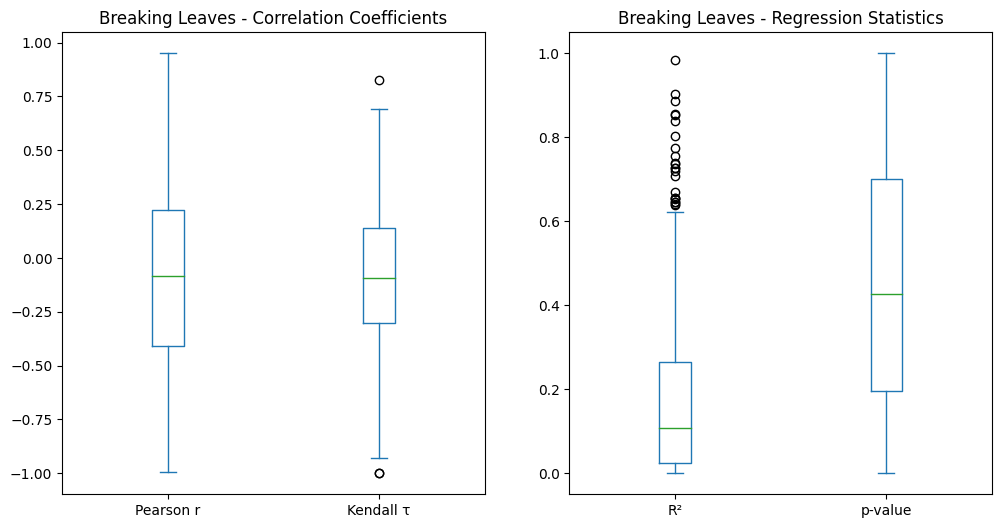

In [34]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_break[['Pearson r','Kendall τ']].plot.box(ax=axs[0])
axs[0].set_title('Breaking Leaves - Correlation Coefficients')

df_break[['R²','p-value']].plot.box(ax=axs[1])
axs[1].set_title('Breaking Leaves - Regression Statistics')

plt.show()

In [36]:
import altair as alt

chart1 = alt.Chart(df_break).mark_point().encode(
    x='p-value',
    y='Kendall τ',
    tooltip=['site', 'State', 'p-value', 'Kendall τ']
).interactive().properties(width=600, height=400, title='Breaking Leaves - Kendall τ against p-value' )

chart2 = alt.Chart(df_break).mark_point().encode(
    x='p-value',
    y='Pearson r',
    tooltip=['site', 'State', 'p-value', 'Pearson r']
).interactive().properties(width=600, height=400, title='Breaking Leaves - Pearson r against p-value')

rule1 = alt.Chart(df_break).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

rule2 = alt.Chart(df_break).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

layer_chart = (chart1 + rule1) | (chart2 + rule2)
layer_chart.spacing = 50
layer_chart

alt.HConcatChart(...)

## Instances with p-value < .05

In [45]:
sub_df_break = df_break[df_break['p-value']<.05]
print(sub_df_break.shape[0], ' signifcant instances from ', df_break.shape[0], ' total')
sub_df_break.sort_values('p-value')

40  signifcant instances from  643  total


,dataset,event,grouping,observations,Pearson r,Kendall τ,slope,R²,p-value,State,site
88,pheno_woody,breaking leaves,"Quercus, rubra, Bridge Trail, NY",12,-0.8410,-0.7385,-3.9879,0.7072,0.0006,NY,Bridge Trail
251,pheno_woody,breaking leaves,"Tilia, americana, Cayuga Nature Center, NY",8,-0.9232,-0.9092,-2.7669,0.8523,0.0010,NY,Cayuga Nature Center
398,pheno_woody,breaking leaves,"Acer, saccharinum, Garden Way and Museum Lawn, NY",8,-0.9158,-0.6429,-6.1389,0.8386,0.0013,NY,Garden Way and Museum Lawn
9,pheno_woody,breaking leaves,"Magnolia, stellata, Home, ME",9,-0.8528,-0.6480,-2.9833,0.7273,0.0032,ME,Home
120,pheno_woody,breaking leaves,"Acer, saccharum, South of garden terraces, CT",9,-0.8520,-0.7432,-2.8062,0.7259,0.0032,CT,South of garden terraces
85,pheno_woody,breaking leaves,"Liriodendron, tulipifera, Bridge Trail, NY",12,-0.7560,-0.5231,-3.4879,0.5715,0.0041,NY,Bridge Trail
70,pheno_woody,breaking leaves,"Quercus, macrocarpa, Home, MN",10,0.8184,0.6293,2.9500,0.6698,0.0043,MN,Home
417,pheno_woody,breaking leaves,"Carya, glabra, Rock Garden and Native Plant Ga...",6,-0.9409,-0.6901,-4.8043,0.8853,0.0049,NY,Rock Garden and Native Plant Garden
196,pheno_woody,breaking leaves,"Cornus, florida, Michigan house, MI",8,0.8597,0.6429,2.7381,0.7392,0.0068,MI,Michigan house
382,pheno_woody,breaking leaves,"Hamamelis, virginiana, Huyck Preserve Falls Tr...",6,-0.9247,-1.0000,-3.8235,0.8550,0.0079,NY,Huyck Preserve Falls Trail


In [37]:
state_counts = sub_df_break['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Breaking Leaves - Number of significant instances by State',
    geo_scope='usa',
)

fig.show()

# **Analysis of Colored Leaves**

#### Average p-value by state



In [38]:
state_means = df_color.groupby('State')[['Pearson r',
       'Kendall τ', 'slope', 'R²', 'p-value']].mean()
state_means = state_means.reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['p-value'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "p-value",
))

fig.update_layout(
    title_text = 'Colored leaves - mean p-value by state',
    geo_scope='usa',
)

fig.show()

####Average correlation by state

In [39]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['Pearson r'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'YlGnBu' ,
    colorbar_title = "Pearson correlation coefficient",
))

fig.update_layout(
    title_text = 'Colored leaves - mean correlation coefficient by State',
    geo_scope='usa',
)

fig.show()

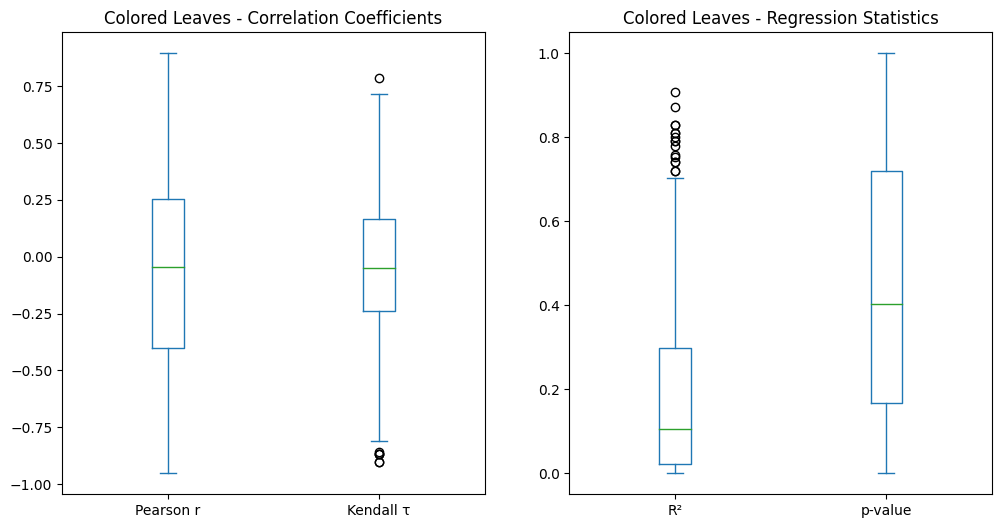

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_color[['Pearson r','Kendall τ']].plot.box(ax=axs[0])
axs[0].set_title('Colored Leaves - Correlation Coefficients')

df_color[['R²','p-value']].plot.box(ax=axs[1])
axs[1].set_title('Colored Leaves - Regression Statistics')

plt.show()

In [25]:

chart1 = alt.Chart(df_color).mark_point().encode(
    x='p-value',
    y='Kendall τ',
    tooltip=['site', 'State', 'p-value', 'Kendall τ']
).interactive().properties(width=600, height=400, title='Colored Leaves - Kendall τ against p-value' )

chart2 = alt.Chart(df_color).mark_point().encode(
    x='p-value',
    y='Pearson r',
    tooltip=['site', 'State', 'p-value', 'Pearson r']
).interactive().properties(width=600, height=400, title='Colored Leaves - Pearson r against p-value')

rule1 = alt.Chart(df_color).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

rule2 = alt.Chart(df_color).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

layer_chart = (chart1 + rule1) | (chart2 + rule2)
layer_chart.spacing = 50
layer_chart

alt.HConcatChart(...)

## Instances with p-value < .05

In [46]:
sub_df_color = df_color[df_color['p-value']<.05]
print(sub_df_color.shape[0], ' significant instances from ', df_color.shape[0], ' total')
sub_df_color.sort_values('p-value')

59  significant instances from  605  total


,dataset,event,grouping,observations,Pearson r,Kendall τ,slope,R²,p-value,State,site
7,pheno_woody,colored leaves,"Magnolia, stellata, Home, ME",8,-0.9106,-0.8571,-5.1171,0.8292,0.0015,ME,Home
2,pheno_woody,colored leaves,"Betula, papyrifera, Home, ME",13,-0.7368,-0.6154,-2.6714,0.5429,0.0029,ME,Home
419,pheno_woody,colored leaves,"Carya, glabra, Hickory Route, MA",8,-0.8825,-0.7857,-4.3426,0.7789,0.0032,MA,Hickory Route
404,pheno_woody,colored leaves,"Acer, platanoides, Ecology Phenology Project, MA",6,-0.9523,-0.7333,-28.7843,0.9069,0.0033,MA,Ecology Phenology Project
336,pheno_woody,colored leaves,"Fraxinus, americana, Huyck Preserve Falls Trai...",8,0.8943,0.7143,2.6259,0.7997,0.0035,NY,Huyck Preserve Falls Trail
24,pheno_woody,colored leaves,"Malus, pumila, my NE side yard, MA",12,-0.7634,-0.4545,-10.1644,0.5827,0.0036,MA,my NE side yard
11,pheno_woody,colored leaves,"Rhamnus, cathartica, Home, ME",9,-0.8371,-0.7222,-5.1572,0.7008,0.0042,ME,Home
49,red_maple,colored leaves,"Acer, rubrum, Lily_Pond, MA",7,-0.8994,-0.9048,-2.3648,0.8089,0.0046,MA,Lily_Pond
439,pheno_woody,colored leaves,"Acer, rubrum, Lily Pond, MA",7,-0.8994,-0.9048,-2.3648,0.8089,0.0046,MA,Lily Pond
1,pheno_woody,colored leaves,"Amelanchier, arborea, Home, ME",12,-0.7262,-0.4848,-2.3747,0.5274,0.0056,ME,Home


In [40]:

state_counts = sub_df_color['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Colored leaves - Number of significant instances by State',
    geo_scope='usa',
)

fig.show()

# **Analysis of Bloom**

####Average p-value by state

In [41]:
state_means = df_bloom.groupby('State')[['Pearson r',
       'Kendall τ', 'slope', 'R²', 'p-value']].mean()
state_means = state_means.reset_index()

import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['p-value'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "p-value",
))

fig.update_layout(
    title_text = 'Bloom - mean p-value by state',
    geo_scope='usa',
)

fig.show()


####Average correlation by state

In [42]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_means['State'],
    z = state_means['Pearson r'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'YlGnBu' ,
    colorbar_title = "Pearson correlation coefficient",
))

fig.update_layout(
    title_text = 'Bloom - mean correlation coefficient by state',
    geo_scope='usa',
)

fig.show()

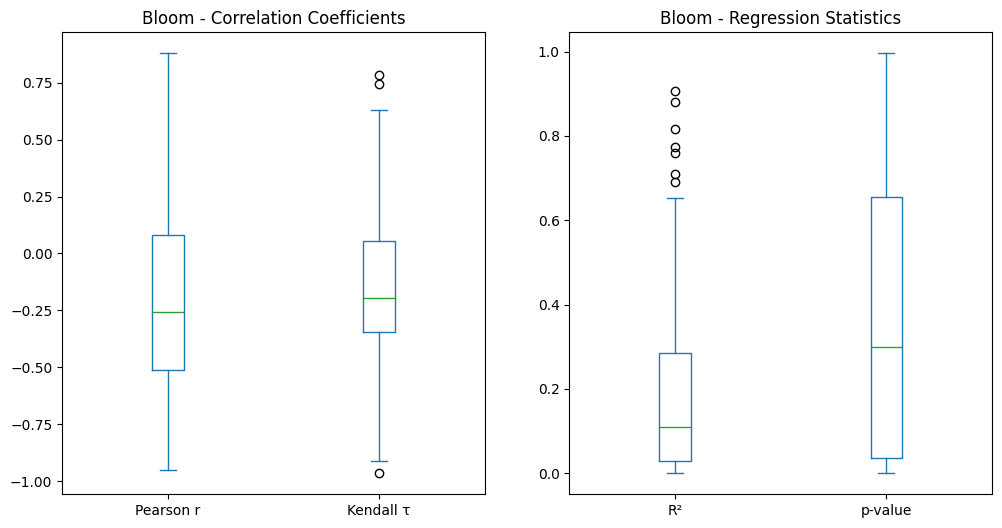

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_bloom[['Pearson r','Kendall τ']].plot.box(ax=axs[0])
axs[0].set_title('Bloom - Correlation Coefficients')
df_bloom[['R²','p-value']].plot.box(ax=axs[1])
axs[1].set_title('Bloom - Regression Statistics')

plt.show()

In [29]:
import altair as alt

chart1 = alt.Chart(df_bloom).mark_point().encode(
    x='p-value',
    y='Kendall τ',
    tooltip=['site', 'State', 'p-value', 'Kendall τ']
).interactive().properties(width=600, height=400, title='Bloom - Kendall τ against p-value' )

chart2 = alt.Chart(df_bloom).mark_point().encode(
    x='p-value',
    y='Pearson r',
    tooltip=['site', 'State', 'p-value', 'Pearson r']
).interactive().properties(width=600, height=400, title='Bloom - Pearson r against p-value')

rule1 = alt.Chart(df_bloom).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

rule2 = alt.Chart(df_bloom).mark_rule(color='red', opacity=0.5, strokeWidth=2, strokeDash=[4, 4]).encode(
    x=alt.datum(0.05)
)

layer_chart = (chart1 + rule1) | (chart2 + rule2)
layer_chart.spacing = 50
layer_chart

alt.HConcatChart(...)

## Instances with p-value < .05

In [47]:
sub_df_bloom = df_bloom[df_bloom['p-value']<.05]
print(sub_df_bloom.shape[0], ' significant instances from ', df_bloom.shape[0], ' total')
sub_df_bloom.sort_values('p-value')

90  significant instances from  329  total


,dataset,event,grouping,observations,Pearson r,Kendall τ,slope,R²,p-value,State,site
2,herbs_mohonk,bloom,"Penstemon, digitalis, Mohonk, NY",16,-0.8718,-0.6156,-0.4227,0.7601,0.0000,NY,Mohonk
88,herbs_mohonk,bloom,"Ageratina, altissima, Mohonk, NY",30,-0.6711,-0.5250,-1.1259,0.4503,0.0000,NY,Mohonk
72,herbs_mohonk,bloom,"Trillium, erectum, Mohonk, NY",55,-0.5046,-0.3456,-0.1671,0.2547,0.0000,NY,Mohonk
20,herbs_mohonk,bloom,"Tussilago, farfara, Mohonk, NY",48,-0.7295,-0.5065,-0.5638,0.5321,0.0000,NY,Mohonk
63,herbs_mohonk,bloom,"Cypripedium, acaule, Mohonk, NY",31,-0.6052,-0.3812,-0.2657,0.3662,0.0000,NY,Mohonk
85,herbs_mohonk,bloom,"Erythronium, americanum, Mohonk, NY",54,-0.5207,-0.3487,-0.1450,0.2711,0.0000,NY,Mohonk
13,herbs_mohonk,bloom,"Cirsium, vulgare, Mohonk, NY",26,-0.6979,-0.4331,-0.7368,0.4871,0.0000,NY,Mohonk
35,herbs_mohonk,bloom,"Panax, trifolius, Mohonk, NY",42,-0.7247,-0.5343,-0.4244,0.5252,0.0000,NY,Mohonk
16,herbs_mohonk,bloom,"Cirsium, arvense, Mohonk, NY",26,-0.7662,-0.6595,-0.6434,0.5871,0.0000,NY,Mohonk
28,herbs_mohonk,bloom,"Asclepias, syriaca, Mohonk, NY",27,-0.6304,-0.2704,-0.5219,0.3974,0.0001,NY,Mohonk


In [43]:
import pandas as pd
import plotly.graph_objects as go

state_counts = sub_df_bloom['State'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='YlGnBu',
    colorbar_title='Count',
))

fig.update_layout(
    title_text='Bloom Number of significant instances by State',
    geo_scope='usa',
)

fig.show()